# **Proyecto final Data Science - Coderhouse - Juan Ignacio Szurlewicz** 

## Título: Wheather prediction in Seattle

El objetivo del presente proyecto es obtener mediante un set de datos de la ciudad de Seattle y un algoritmo de clasificación, un modelo que nos permita pronosticar de manera categórica el clima futuro, contemplando un conjunto de variables observadas.Título: Wheather prediction on Seattle

El set de datos empleado se encuentra en http://kaggle.com, en el siguiente link :
https://www.kaggle.com/datasets/ananthr1/weather-prediction

# Data Acquisition

Para la realización de la etapa de Data Acquisition se procedió a la búsqueda de un dataset que a travéz de variables claves, nos permita llegar a nuestra variable target propuesta. En este sentido, nos encontramos con el dataset de variables climatologicas de la ciudad de Seattle. El mismo, se encontraba en formato .CSV, es decir, de texto en columnas, clasificandose como un tipo de dato estructurado.

Para la lectura del archivo utilizamos la libreria pandas que, a travéz del comando read_csv nos permite la carga de este tipo de archivos planos.

In [5]:
import pandas as pd
import datetime as dt

In [6]:
_df=pd.read_csv(r"C:\Users\Novix\Downloads\seattle-weather.csv")

In [7]:
_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Así, pudimos completar la lectura de nuestro dataset y a través del comando Head obtener los primeros 5 valores del conjunto de datos y observar, cuáles son nuestras variables consideradas. El siguiente paso es ir hacia el Data Wrangling, mediante el cuál haremos un descubrimiento mayor del conjunto de datos, su limpieza, estructuración y validación.

# Data Wrangling

La etapa del datawrangling consiste en la manipulación de los datos obtenidos en la etapa previa, de forma tal que sean más amigables y adecuados para su trabajo y para el logro del objetivo final. Dentro de esta etapa, iremos abarcando las distintas tareas del descubrimiento, estructuración, limpieza, enriquecimiento, validación y publicación.

Comenzamos con la lectura del dataframe:

In [8]:
_df.head() #Aquí identificamos a primera vista las variables que componen el set de datos

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [9]:
_df.shape #Vemos el tamaño de nuestro dataset

(1461, 6)

In [10]:
_df.isna().sum() #Analizamos si tenemos algun missing value en el set de datos

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [11]:
_df.describe().T  #Obtenemos una visión general de las variables, con sus principales estadísticas descriptivas

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


In [12]:
_df.dtypes #Aquí podemos ver los tipos de datos, vamos a pasar la variables date a datetime. El resto están bien asignadas

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [13]:
_df['date'] = pd.to_datetime(_df['date'])

In [14]:
_df.dtypes #Quedaron los tipos corregidos

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

# Exploratory Data Analysis

El exploratory data analysis consiste en una etapa que tiene como finalidad la exploración del conjunto de variables, de forma univariada como así tambien de forma bivariada y multivariada. Debemos comprender que representa cada una de ellas, si existen casos atípicos que puedan influir la consistencia de nuestro modelo antes de aplicar el mismo. Se deben preparar los datos para que los mismos representen de la forma más fiel el eje del problema en cuestión. Para ello, se realizan analisis gráficos en una primera instancia y luego analisis de medidas descriptivas. Si es necesario, se deben decidir cursos de acción para solucionar problemas como la presencia de missing values y valores outliers.

In [15]:
#Importamos las librerias necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from seaborn import boxplot
from seaborn import violinplot
import numpy as np

### Análisis univariado de las variables consideradas

#### 1) Wheater

In [16]:
_df.weather.describe()

count     1461
unique       5
top       rain
freq       641
Name: weather, dtype: object

<AxesSubplot:xlabel='weather', ylabel='count'>

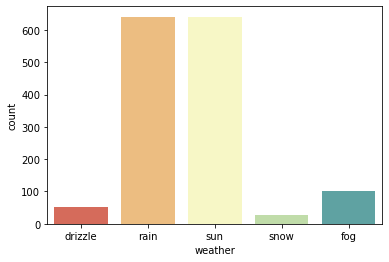

In [17]:
sns.countplot(x=_df['weather'],palette='Spectral')

In [18]:
frec = _df["weather"].value_counts()
Wheater_freq=pd.DataFrame(frec)
Wheater_freq=Wheater_freq.rename(columns={'weather':'Frecuencia Absoluta'})
Frec_abs_val = Wheater_freq["Frecuencia Absoluta"].values
acum = []
valor_acum = 0
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
Wheater_freq["frec_abs_acum"] = acum
Wheater_freq["frec_rel_%"] = round(100 * Wheater_freq["Frecuencia Absoluta"]/len(_df.weather),4)
Frec_rel_val = Wheater_freq["frec_rel_%"].values
acum = []
valor_acum = 0
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
Wheater_freq["frec_rel_%_acum"] = acum
Wheater_freq

,Frecuencia Absoluta,frec_abs_acum,frec_rel_%,frec_rel_%_acum
rain,641,641,43.8741,43.8741
sun,640,1281,43.8056,87.6797
fog,101,1382,6.9131,94.5928
drizzle,53,1435,3.6277,98.2205
snow,26,1461,1.7796,100.0001


Por medio de la tabla de frecuencias podemos ver que entre la condición climática "lluvia" y "soleado" se presenta en casi 90% de los casos.

#### 2) Precipitation

Esta variable se encuentra en pulgadas

In [19]:
_df.precipitation.describe().T

count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

<AxesSubplot:xlabel='precipitation'>

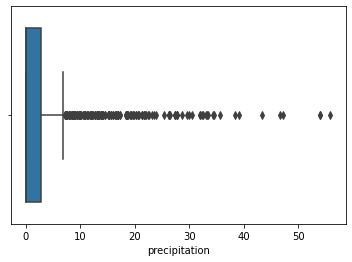

In [20]:
boxplot(x=_df.precipitation, orient="Vertical")

Como podemos observar, encontramos valores outliers superiores, pero lo atribuimos a la naturaleza de la variable precipitación, ya que se trata de un fenómeno natural que puede presentar eventos disruptivos que no siguen una distribución normal.

(0.0, 50.0)

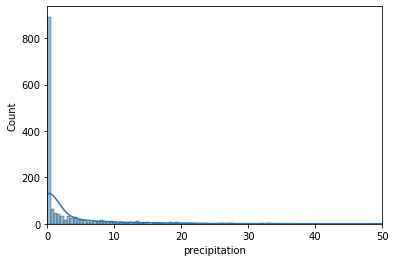

In [21]:
sns.histplot(data=_df.precipitation,kde=True)
plt.xlim(0,50)

Podemos ver una clara asimetria hacia la derecha

In [22]:
frec = _df["precipitation"].value_counts()
precipitation_freq=pd.DataFrame(frec)
precipitation_freq=precipitation_freq.rename(columns={'precipitation':'Frecuencia Absoluta'})
Frec_abs_val = precipitation_freq["Frecuencia Absoluta"].values
acum = []
valor_acum = 0
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
precipitation_freq["frec_abs_acum"] = acum
precipitation_freq["frec_rel_%"] = round(100 * precipitation_freq["Frecuencia Absoluta"]/len(_df.precipitation),4)
Frec_rel_val = precipitation_freq["frec_rel_%"].values
acum = []
valor_acum = 0
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
precipitation_freq["frec_rel_%_acum"] = acum
precipitation_freq.sort_values(by='Frecuencia Absoluta',ascending=False)

,Frecuencia Absoluta,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0.0,838,838,57.3580,57.3580
0.3,54,892,3.6961,61.0541
0.5,40,932,2.7379,63.7920
1.0,26,958,1.7796,65.5716
1.5,25,983,1.7112,67.2828
...,...,...,...,...
22.1,1,1438,0.0684,98.4250
32.5,1,1439,0.0684,98.4934
28.7,1,1440,0.0684,98.5618
12.4,1,1441,0.0684,98.6302


In [23]:
precipitation_freq.head()  #Los primeros 5 valores en la distribución de frecuencia absoluta

,Frecuencia Absoluta,frec_abs_acum,frec_rel_%,frec_rel_%_acum
0.0,838,838,57.3580,57.3580
0.3,54,892,3.6961,61.0541
0.5,40,932,2.7379,63.7920
1.0,26,958,1.7796,65.5716
1.5,25,983,1.7112,67.2828


In [24]:
precipitation_freq.tail()   #Los últimos 5 valores en la distribución de frecuencia absoluta

,Frecuencia Absoluta,frec_abs_acum,frec_rel_%,frec_rel_%_acum
30.0,1,1457,0.0684,99.7246
26.4,1,1458,0.0684,99.7930
19.1,1,1459,0.0684,99.8614
46.7,1,1460,0.0684,99.9298
21.8,1,1461,0.0684,99.9982


### 3) Wind

Esta variable se encuentra en millas por hora Mph

In [25]:
_df.wind.describe()

count    1461.000000
mean        3.241136
std         1.437825
min         0.400000
25%         2.200000
50%         3.000000
75%         4.000000
max         9.500000
Name: wind, dtype: float64

(0.0, 10.0)

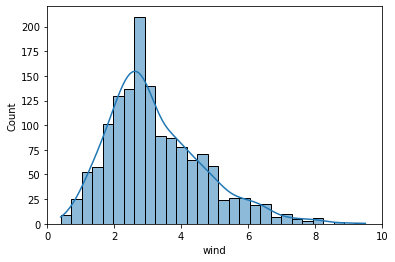

In [26]:
sns.histplot(data=_df.wind,kde=True)
plt.xlim(0,10)

En este caso podemos ver que la distribución es prácticamente normal no estandar

<AxesSubplot:xlabel='wind'>

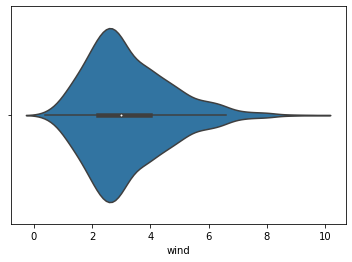

In [27]:
violinplot(x=_df.wind, data=_df , orient="Verical")

Aquí podemos visualizar mejor la distribución de los datos, dónde el ancho de la figura indica la frecuencia de ocurrencia absoluta de los valores.

### 3) Temp_Max

Esta variable se encuentra en grados celcius C°

In [28]:
_df.temp_max.describe()

count    1461.000000
mean       16.439083
std         7.349758
min        -1.600000
25%        10.600000
50%        15.600000
75%        22.200000
max        35.600000
Name: temp_max, dtype: float64

(0.0, 36.0)

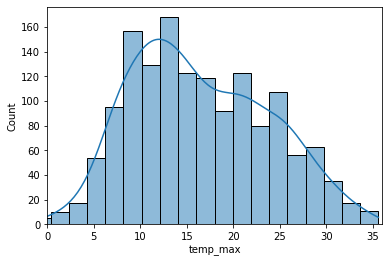

In [29]:
sns.histplot(data=_df.temp_max,kde=True)
plt.xlim(0,36)

En este caso tambien, la distribución es prácticamente normal, media 16.43 y desviación estándar +- 7.35, si observamos las estadísticas descriptivas, el 25% de la distribución se da en 10.6 (16.43-7.35=9) y el 75% es en 22.2 (16.43+7.35=23.78)

### 3) Temp_Min

Esta variable se encuentra en grados celcius C°

In [30]:
_df.temp_min.describe()

count    1461.000000
mean        8.234771
std         5.023004
min        -7.100000
25%         4.400000
50%         8.300000
75%        12.200000
max        18.300000
Name: temp_min, dtype: float64

(0.0, 18.3)

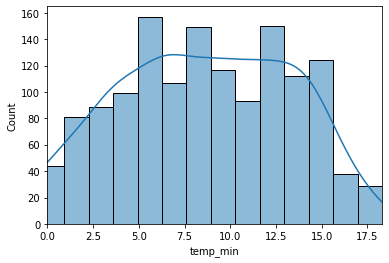

In [31]:
sns.histplot(data=_df.temp_min,kde=True)
plt.xlim(0,18.3)

Aquí la distribución ya no parece la de una normal. La temperatura mínima observada se encuentra distribuida de manera más uniforme

<AxesSubplot:xlabel='temp_min'>

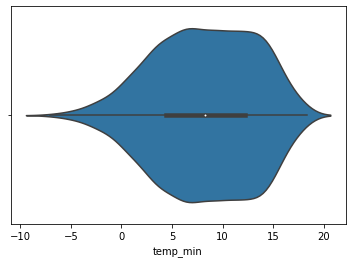

In [32]:
violinplot(x=_df.temp_min, data=_df , orient="Verical")

La densidad que representa la figura es más amplia respecto al eje x, con lo cuál, para cada temperatura mínima existe un número similar de ocurrencias

### Análisis bivariado de las variables consideradas

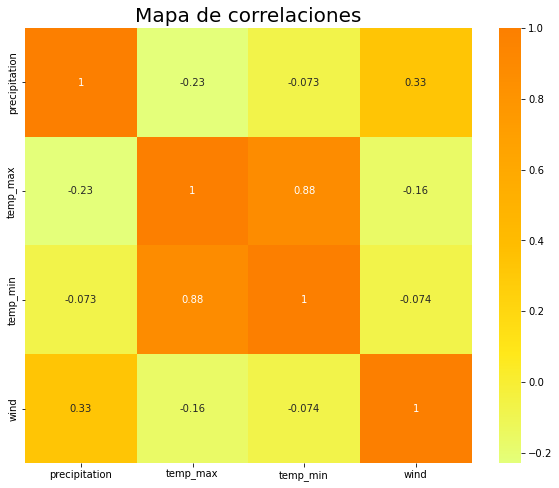

In [33]:
plt.rcParams['figure.figsize'] = (10,8)

sns.heatmap(_df.corr(), annot = True, cmap = 'Wistia')
plt.title('Mapa de correlaciones', fontsize = 20)
plt.show()

Analizamos mediante el mapa de correlaciones la relación lineal entre las variables cuantitativas bajo análisis.

### 1) Weather vs Wind

Text(0.5, 1.0, 'Relacion entre Sex and target')

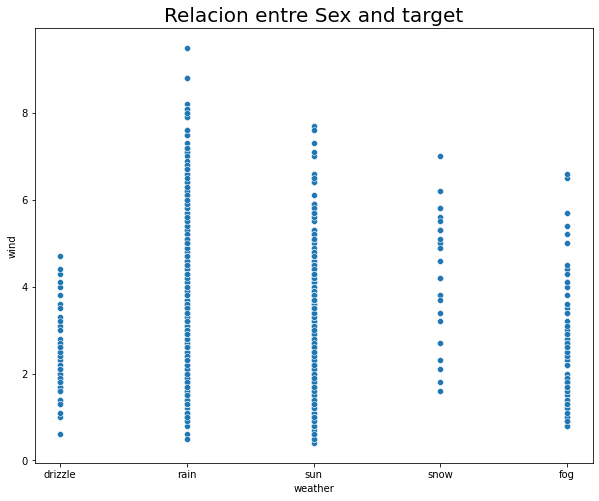

In [34]:
sns.scatterplot(x="weather", y="wind", data=_df)
plt.title('Relacion entre Sex and target', fontsize = 20, fontweight = 30)

Podemos ver que en el caso de la llovizna, el viento es débil. Luego, para el caso de las lluvias, la distribución es mas uniforme. Por otro lado, en el caso del clima soleado, suele darse con mayor concentración para velocidades de viento menores. Por último, para el caso de la nieve y la niebla, hay algunos puntos pero la relación es débil. La niebla es más probable con poco viento.

In [35]:
_df.groupby('weather')[['wind']].mean()  #Medias dentro de cada tipo de clima

,wind
weather,
drizzle,2.367925
fog,2.481188
rain,3.669891
snow,4.411538
sun,2.956406


### 2) Weather vs Precipitation

Text(0.5, 1.0, 'Relacion entre Sex and target')

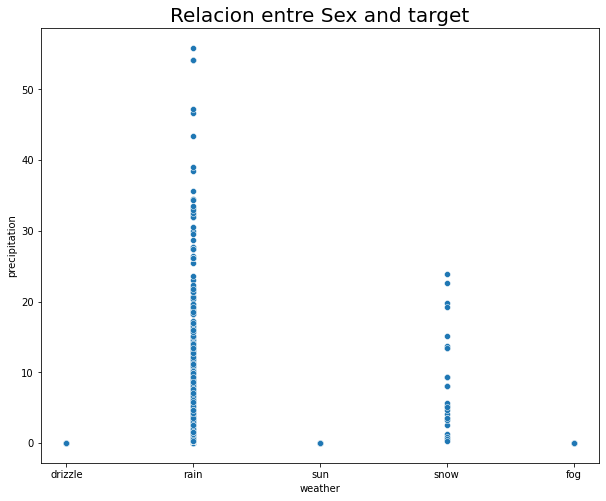

In [36]:
sns.scatterplot(x="weather", y="precipitation", data=_df)
plt.title('Relacion entre Sex and target', fontsize = 20, fontweight = 30)

Aquí podemos observar que las precipitaciones sólo se dan en el clima de lluvia y nieve. No se detectan precipitaciones en climas de neblina o llovizna.

In [37]:
_df.groupby('weather')[['precipitation']].mean()  #Medias dentro de cada tipo de clima

,precipitation
weather,
drizzle,0.000000
fog,0.000000
rain,6.557878
snow,8.553846
sun,0.000000


### 3) Weather vs Temp_min

Text(0.5, 1.0, 'Relacion entre Sex and target')

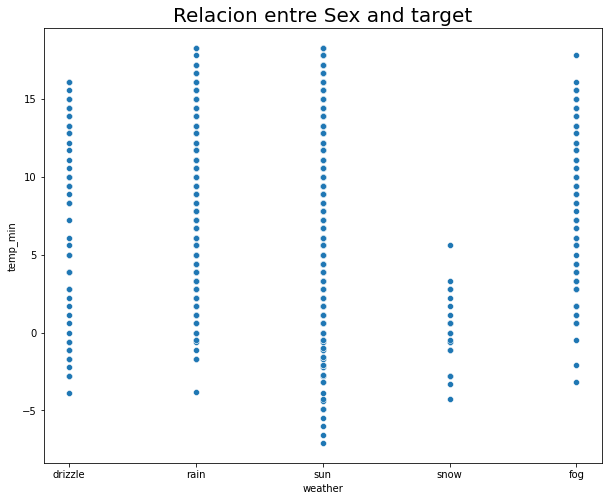

In [38]:
sns.scatterplot(x="weather", y="temp_min", data=_df)
plt.title('Relacion entre Sex and target', fontsize = 20, fontweight = 30)

Podemos observar de forma gráfica que los climas de llovizna, lluvia y niebla con compatibles con temperaturas mínimas mas elevadas. En el caso del clima soleado se presente para todas las temperaturas mínimas observadas y en el caso de nieve, para casos de temperaturas mínimas bajas.

In [39]:
_df.groupby('weather')[['temp_min']].mean()  #Medias dentro de cada tipo de clima, reforzamos el análisis gráfico.v

,temp_min
weather,
drizzle,7.111321
fog,7.979208
rain,7.588768
snow,0.146154
sun,9.343750


### 3) Weather vs Temp_max

Text(0.5, 1.0, 'Relacion entre Sex and target')

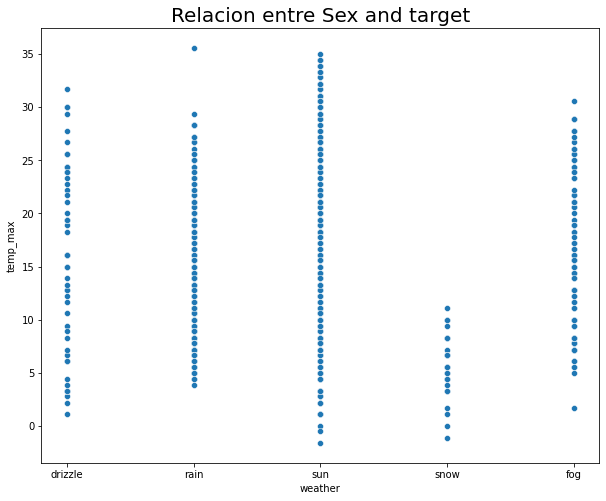

In [40]:
sns.scatterplot(x="weather", y="temp_max", data=_df)
plt.title('Relacion entre Sex and target', fontsize = 20, fontweight = 30)

Podemos observar de forma gráfica que los climas de llovizna, lluvia y niebla con compatibles con temperaturas máximas mas elevadas. En el caso del clima soleado se presente para todas las temperaturas mínimas observadas y en el caso de nieve, para casos de temperaturas mínimas bajas.

In [41]:
_df.groupby('weather')[['temp_max']].mean()  #Medias dentro de cada tipo de clima

,temp_max
weather,
drizzle,15.926415
fog,16.757426
rain,13.454602
snow,5.573077
sun,19.861875


### Análisis multivariado de las variables consideradas

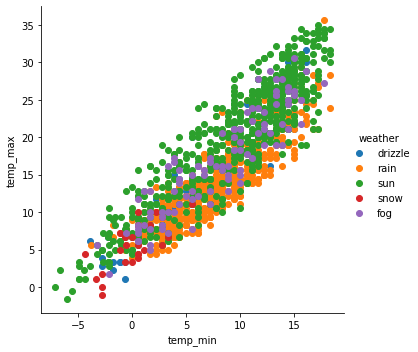

In [42]:
sns.FacetGrid(_df,hue = 'weather' , height = 5).map(plt.scatter,'temp_min','temp_max').add_legend();
plt.show()

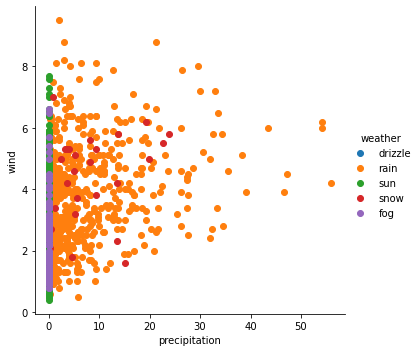

In [43]:
sns.FacetGrid(_df,hue = 'weather' , height = 5).map(plt.scatter,'precipitation','wind').add_legend();
plt.show()

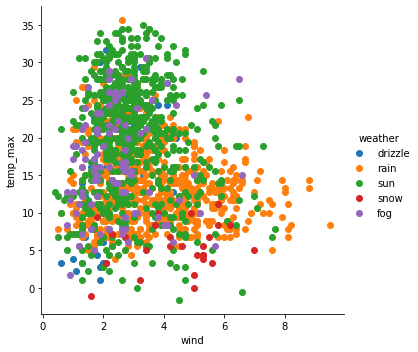

In [44]:
sns.FacetGrid(_df,hue = 'weather' , height = 5).map(plt.scatter,'wind','temp_max').add_legend();
plt.show()

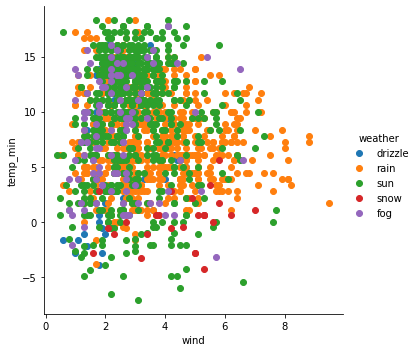

In [45]:
sns.FacetGrid(_df,hue = 'weather' , height = 5).map(plt.scatter,'wind','temp_min').add_legend();
plt.show()

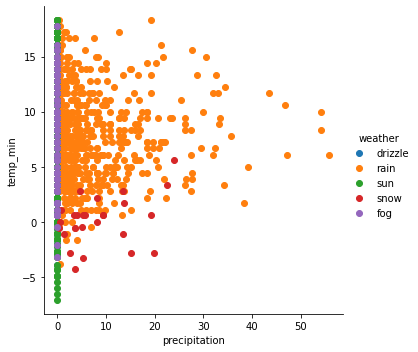

In [46]:
sns.FacetGrid(_df,hue = 'weather' , height = 5).map(plt.scatter,'precipitation','temp_min').add_legend();
plt.show()

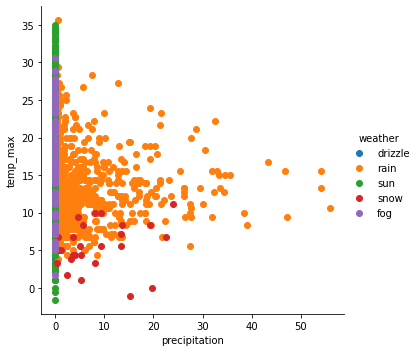

In [47]:
sns.FacetGrid(_df,hue = 'weather' , height = 5).map(plt.scatter,'precipitation','temp_max').add_legend();
plt.show()

Podemos observar que existe sólo un claro patrón en el primer caso, de temperatura min vs temperatura máx. En el resto de los casos, no hay un patrón.

<Figure size 1200x960 with 0 Axes>

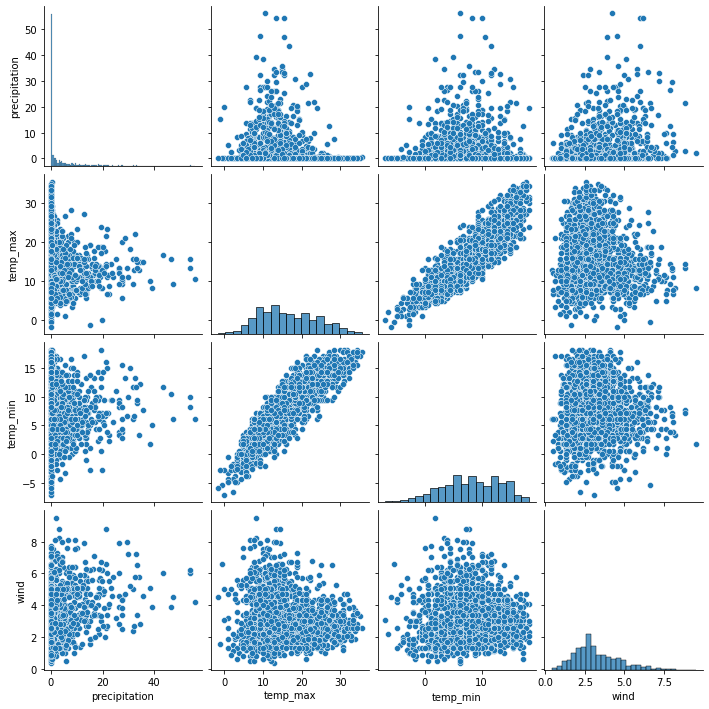

In [48]:
plt.figure(dpi=120)
sns.pairplot(_df)
plt.show()

Aquí podemos observar lo mismo que antes y sacar las mismas conclusiones, sin discriminar por tipo de clima.

In [49]:
_df.groupby('weather')[['precipitation','wind','temp_min','temp_max']].mean().T

weather,drizzle,fog,rain,snow,sun
precipitation,0.000000,0.000000,6.557878,8.553846,0.000000
wind,2.367925,2.481188,3.669891,4.411538,2.956406
temp_min,7.111321,7.979208,7.588768,0.146154,9.343750
temp_max,15.926415,16.757426,13.454602,5.573077,19.861875


Mediante la tabla descriptiva podemos analizar que:

- **precipitation**: se presenta sólo en el clima de lluvia y nive, con una media de mm mayor en el último estado.
- **wind**: se presenta en todos los estados, con mayor velocidad durante la nieve y climas soleados.
- **temp_min**: se presenta en todos los estados
- **temp_max**: se presenta en todos los estados

In [50]:
_df['date']=pd.to_datetime(_df['date'])

In [51]:
_df['date'] =_df['date'].dt.strftime('%m')

In [52]:
_df.groupby('date')[['precipitation','wind','temp_min','temp_max']].mean().T

date,01,02,03,04,05,06,07,08,09,10,11,12
precipitation,3.758065,3.734513,4.888710,3.128333,1.673387,1.107500,0.388710,1.320161,1.962500,4.059677,5.354167,5.021774
wind,3.138710,3.786726,3.579839,3.524167,3.120161,3.130833,2.911290,2.750806,2.963333,2.939516,3.482500,3.618548
temp_min,2.696774,4.054867,4.858871,6.362500,9.614516,12.244167,14.197581,14.769355,12.358333,9.350806,4.701667,3.325000
temp_max,8.229032,9.860177,12.387097,15.020000,19.295968,22.400000,25.998387,26.112097,21.924167,16.389516,11.023333,8.194355


Mediante dicha tabla podemos analizar el mes, tomando un promedio de los años analizados, con mayor media de cada variable. Entonces, Noviembre es el mes en el cuál mas lluvia hay, Diciembre es el mes con mas vientos, las temperaturas mínimas son mayores en Enero y las máximas en Agosto.

## Objetivo

El objetivo principal del presente proyecto es obtener mediante un algoritmo de machine learning, un modelo que a travéz de los inputs analizados nos permita pronosticar el clima en la ciudad de Seattle. Nuestra variable target es entonces la variable "Weather" y las variables explicativas son las precipitaciones en pulgadas, la velocidad del viento en millas por hora y la temperatura mínima y máxima en grados celcius.

# Algoritmos de clasificación

Utilizaremos al menos 2 algoritmos de clasificación para trabajar sobre el dataset propuesto y predecir la variable target del mismo.

## 1) KNN - k nearest neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier  # Importamos la libreria y el algoritmo necesario
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split


In [54]:
#defino las variables explicativas y la variable target              
X = _df[['precipitation', 'wind','temp_min','temp_max']]
Y = _df[['weather']]

Chequeo mis variables

In [55]:
X

,precipitation,wind,temp_min,temp_max
0,0.0,4.7,5.0,12.8
1,10.9,4.5,2.8,10.6
2,0.8,2.3,7.2,11.7
3,20.3,4.7,5.6,12.2
4,1.3,6.1,2.8,8.9
...,...,...,...,...
1456,8.6,2.9,1.7,4.4
1457,1.5,1.3,1.7,5.0
1458,0.0,2.6,0.6,7.2
1459,0.0,3.4,-1.0,5.6


In [56]:
Y

,weather
0,drizzle
1,rain
2,rain
3,rain
4,rain
...,...
1456,rain
1457,rain
1458,fog
1459,sun


Vamos a hacer la etapa de validación de datos para el entrenamiento del modelo, por ende hacemos el Split de los datos entre el subdataset que irá a test y el subdataset que irá a trainning.

In [57]:
#Defino un test size del 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [58]:
print(X_train.shape)  #Miro la cantidad de datos que me quedan en cada grupo, dentro del test y dentro del trainning
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1022, 4)
(439, 4)
(1022, 1)
(439, 1)


In [59]:
knn = KNeighborsClassifier(n_neighbors=4)  #Armo el algoritmo con sus variables
knn.fit(X_train, Y_train)

C:\Users\Novix\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [95]:
Y_pred_KNN = knn.predict(X_test) #Defino mi variable predecida

In [96]:
Accuracy_KNN = accuracy_score(Y_test, Y_pred)  #Miro el Accuracy
print(f"Accuracy score: {Accuracy_KNN}")

Accuracy score: 0.7198177676537585


In [97]:
f1_score(Y_test,Y_pred,average='weighted') #Obtengo el F1 Score

0.709019280195728

## 2) Random Forest

Importamos las librerias necesarias

In [98]:
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Las variables son las mismas y usamos los mismos conjuntos de datos de Train y Test

In [99]:
tree = DecisionTreeClassifier(random_state=11)  #Creo el algoritmo
tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=11)

In [100]:
Y_pred_RF = tree.predict(X_test) #Genero la variable Y predecida

In [102]:
Accuracy_RF = accuracy_score(Y_test, Y_pred_RF)

print('% de aciertos sobre el set de evaluación:',Accuracy_RF)

% de aciertos sobre el set de evaluación: 0.7471526195899773


In [104]:
f1_score(Y_test,Y_pred_RF,average='weighted') #Obtengo el F1 Score

0.7523193365946411

Hago un Dataframe Comparativo

In [105]:
datos = [[0.7198,0.7090 ],
[0.7494, 0.7561]]
columnas = ['ACC', 'F1']
filas = ['KNN', 'RF']
df = pd.DataFrame(datos, columns=columnas, index=filas)
df

,ACC,F1
KNN,0.7198,0.7090
RF,0.7494,0.7561


# Segunda Entrega


En esta segunda entrega se evaluará otro algoritmo más de clasificación (SVM) y luego se realizará la comparativa mediante las metricas adecuadas de los distintos algoritmos, eligiendo uno de ellos para la entrega final del proyecto.

## 3) SVM

Importamos las librerias necesarias

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Las variables son las mismas y usamos los mismos conjuntos de datos de Train y Test

In [106]:
# Creación del modelo SVM 
modelo = SVC(C = 100, kernel = 'linear', random_state=45)
modelo.fit(X_train, Y_train)

C:\Users\Novix\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, kernel='linear', random_state=45)

In [107]:
Y_pred_SVC_train = modelo.predict(X_train)
Y_pred_SVC_test = modelo.predict(X_test)

In [109]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(Y_train, Y_pred_SVC_train)
print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8561643835616438


In [111]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(Y_test, Y_pred_SVC_test)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8405466970387244


# Análisis Comparativo de Algoritmos

Realizaremos una comparación de los algoritmos de clasificación utilizados y mediante las metricas vistas realizamos el análisis comparativo y la elección dentro de los mismos

a) Accuracy

In [112]:
Accuracy_KNN = accuracy_score(Y_test, Y_pred_KNN)  #Miro el Accuracy
print(f"Accuracy score del modelo KNN: {Accuracy_KNN}")

Accuracy score del modelo KNN: 0.7198177676537585


In [113]:
Accuracy_RF = accuracy_score(Y_test, Y_pred_RF)

print('Accuracy score del modelo Random Forest:',Accuracy_RF)

Accuracy score del modelo Random Forest: 0.7471526195899773


In [117]:
Accuracy_SVC = accuracy_score(Y_test, Y_pred_SVC_test)

print('Accuracy score del modelo SVM:',Accuracy_SVC)

Accuracy score del modelo SVM: 0.8405466970387244


b) Accuracy